# Machine Learning Assignment 3
###  Prepared by Sujil Kumar K.M (D00242726)
##### Trump Approval Ratings

In [1]:
import pandas as pd
import numpy as np
import os
df = pd.read_csv('E:\\Mchine_Learning\\temp_repo_for_ml_reflection\\approval_polllist.csv')
df.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,1/20/2021,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.686784,38.055805,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,11:47:59 20 Jan 2021
1,Donald Trump,All polls,1/20/2021,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.262323,...,45.0,45.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,11:47:59 20 Jan 2021
2,Donald Trump,All polls,1/20/2021,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.451563,43.780389,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,11:47:59 20 Jan 2021
3,Donald Trump,All polls,1/20/2021,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.242845,...,46.0,45.861441,44.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,11:47:59 20 Jan 2021
4,Donald Trump,All polls,1/20/2021,1/22/2017,1/24/2017,Gallup,B,1500.0,a,0.227380,...,45.0,46.861441,43.539189,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,11:47:59 20 Jan 2021


This data contains a trendline for the approval ratings for former US President Donald Trump

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   president            16500 non-null  object 
 1   subgroup             16500 non-null  object 
 2   modeldate            16500 non-null  object 
 3   startdate            16500 non-null  object 
 4   enddate              16500 non-null  object 
 5   pollster             16500 non-null  object 
 6   grade                15940 non-null  object 
 7   samplesize           16500 non-null  float64
 8   population           16500 non-null  object 
 9   weight               16500 non-null  float64
 10  influence            16500 non-null  float64
 11  approve              16500 non-null  float64
 12  disapprove           16500 non-null  float64
 13  adjusted_approve     16500 non-null  float64
 14  adjusted_disapprove  16500 non-null  float64
 15  multiversions        82 non-null    

In [3]:
# checking columns names
df.columns

Index(['president', 'subgroup', 'modeldate', 'startdate', 'enddate',
       'pollster', 'grade', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'adjusted_approve', 'adjusted_disapprove',
       'multiversions', 'tracking', 'url', 'poll_id', 'question_id',
       'createddate', 'timestamp'],
      dtype='object')

In [4]:
# Quick Glance
Glance=10
view=df.head(Glance)
print(view)


      president   subgroup  modeldate  startdate    enddate  \
0  Donald Trump  All polls  1/20/2021  1/20/2017  1/22/2017   
1  Donald Trump  All polls  1/20/2021  1/20/2017  1/22/2017   
2  Donald Trump  All polls  1/20/2021  1/20/2017  1/24/2017   
3  Donald Trump  All polls  1/20/2021  1/21/2017  1/23/2017   
4  Donald Trump  All polls  1/20/2021  1/22/2017  1/24/2017   
5  Donald Trump  All polls  1/20/2021  1/21/2017  1/25/2017   
6  Donald Trump  All polls  1/20/2021  1/22/2017  1/24/2017   
7  Donald Trump  All polls  1/20/2021  1/20/2017  1/25/2017   
8  Donald Trump  All polls  1/20/2021  1/23/2017  1/25/2017   
9  Donald Trump  All polls  1/20/2021  1/23/2017  1/25/2017   

                                   pollster grade  samplesize population  \
0                           Morning Consult   B/C      1992.0         rv   
1                                    Gallup     B      1500.0          a   
2                                     Ipsos    B-      1632.0          a   
3 

In [5]:
# deleting duplicates
df.drop_duplicates(keep='first',inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 0 to 16499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   president            16500 non-null  object 
 1   subgroup             16500 non-null  object 
 2   modeldate            16500 non-null  object 
 3   startdate            16500 non-null  object 
 4   enddate              16500 non-null  object 
 5   pollster             16500 non-null  object 
 6   grade                15940 non-null  object 
 7   samplesize           16500 non-null  float64
 8   population           16500 non-null  object 
 9   weight               16500 non-null  float64
 10  influence            16500 non-null  float64
 11  approve              16500 non-null  float64
 12  disapprove           16500 non-null  float64
 13  adjusted_approve     16500 non-null  float64
 14  adjusted_disapprove  16500 non-null  float64
 15  multiversions        82 non-null    

In [6]:
df['president'].unique()

array(['Donald Trump'], dtype=object)

In [7]:
df = df.drop(columns=['president','timestamp','createddate','enddate','startdate','modeldate','url'])
# df.drop(columns=['president'])

In [8]:
# renaming feature name
df.rename( {'predicted_probability':'pred_prob' } , axis=1 , inplace = True)

In [9]:
df.columns

Index(['subgroup', 'pollster', 'grade', 'samplesize', 'population', 'weight',
       'influence', 'approve', 'disapprove', 'adjusted_approve',
       'adjusted_disapprove', 'multiversions', 'tracking', 'poll_id',
       'question_id'],
      dtype='object')

Column names are seems to be meaningful and suitable, I am not changing any names.

In [10]:
# describing the dataset

description=df.describe()
description

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id
count,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000
mean,3959.069737,0.331903,0.002846,42.284609,53.314490,41.657343,53.373442,59339.240000,102252.656909
std,9590.526091,0.482727,0.050492,3.575006,3.088211,2.737078,2.648731,7265.662819,19924.087731
min,121.000000,0.000000,0.000000,23.900000,35.000000,25.157815,36.766580,49232.000000,77244.000000
25%,1000.000000,0.105366,0.000000,40.000000,51.000000,39.934719,51.795488,52406.750000,82825.000000
50%,1500.000000,0.125446,0.000000,42.000000,53.000000,41.686784,53.343779,57965.500000,94288.000000
75%,2092.000000,0.218587,0.000000,45.000000,55.000000,43.555458,55.055805,66810.250000,124707.000000
max,325970.000000,3.853043,1.399989,59.000000,75.900000,54.837601,70.069753,74229.000000,139350.000000


In [11]:
# limiting the results upto two possible digits after decimals 
pd.set_option('precision', 2)
description_wth_precesion=df.describe()
description_wth_precesion

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id
count,16500.00,16500.00,1.65e+04,16500.00,16500.00,16500.00,16500.00,16500.00,16500.00
mean,3959.07,0.33,2.85e-03,42.28,53.31,41.66,53.37,59339.24,102252.66
std,9590.53,0.48,5.05e-02,3.58,3.09,2.74,2.65,7265.66,19924.09
min,121.00,0.00,0.00e+00,23.90,35.00,25.16,36.77,49232.00,77244.00
25%,1000.00,0.11,0.00e+00,40.00,51.00,39.93,51.80,52406.75,82825.00
50%,1500.00,0.13,0.00e+00,42.00,53.00,41.69,53.34,57965.50,94288.00
75%,2092.00,0.22,0.00e+00,45.00,55.00,43.56,55.06,66810.25,124707.00
max,325970.00,3.85,1.40e+00,59.00,75.90,54.84,70.07,74229.00,139350.00


In [12]:
types=df.dtypes
print(types)

subgroup                object
pollster                object
grade                   object
samplesize             float64
population              object
weight                 float64
influence              float64
approve                float64
disapprove             float64
adjusted_approve       float64
adjusted_disapprove    float64
multiversions           object
tracking                object
poll_id                  int64
question_id              int64
dtype: object


In [13]:
df.head()

,subgroup,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,poll_id,question_id
0,All polls,Morning Consult,B/C,1992.0,rv,0.68,0.0,46.0,37.0,45.69,38.06,NaN,NaN,49249,77261
1,All polls,Gallup,B,1500.0,a,0.26,0.0,45.0,45.0,45.86,43.54,NaN,T,49253,77265
2,All polls,Ipsos,B-,1632.0,a,0.15,0.0,42.1,45.2,43.45,43.78,NaN,T,49426,77599
3,All polls,Gallup,B,1500.0,a,0.24,0.0,45.0,46.0,45.86,44.54,NaN,T,49262,77274
4,All polls,Gallup,B,1500.0,a,0.23,0.0,46.0,45.0,46.86,43.54,NaN,T,49236,77248


Data types seems to be ok , no need to make any changes

In [14]:
### Dicussion regarding the balancing of data set

In [15]:
'''
Correlations between Attributes 
#######################################################################################################
Explain postive and negative Correlations

'''

'\nCorrelations between Attributes \n#######################################################################################################\nExplain postive and negative Correlations\n\n'

In [16]:
# looking for null values
df.isnull().sum()

subgroup                   0
pollster                   0
grade                    560
samplesize                 0
population                 0
weight                     0
influence                  0
approve                    0
disapprove                 0
adjusted_approve           0
adjusted_disapprove        0
multiversions          16418
tracking                9445
poll_id                    0
question_id                0
dtype: int64

In [17]:
# checking number of rows in the dataframe
df.shape[0]

16500

We do not need this much data for analysis, keeping the size of data between n*100 to n*1000 for balance

In [18]:
# taking the first 15k records for the analysis
df = df[:15000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subgroup             15000 non-null  object 
 1   pollster             15000 non-null  object 
 2   grade                14546 non-null  object 
 3   samplesize           15000 non-null  float64
 4   population           15000 non-null  object 
 5   weight               15000 non-null  float64
 6   influence            15000 non-null  float64
 7   approve              15000 non-null  float64
 8   disapprove           15000 non-null  float64
 9   adjusted_approve     15000 non-null  float64
 10  adjusted_disapprove  15000 non-null  float64
 11  multiversions        80 non-null     object 
 12  tracking             6368 non-null   object 
 13  poll_id              15000 non-null  int64  
 14  question_id          15000 non-null  int64  
dtypes: float64(7), int64(2), object(6)
m

In [19]:
# df['_medpoly2'].isnull().sum()

I have noticed around 3700 columnd are empty in distric column, it 24% of total number of columns, I am not going to change anything in these feilds at the moment.

In [20]:
Correlations=df.corr()
Correlations

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id
samplesize,1.00e+00,-9.56e-02,-6.52e-03,-2.50e-02,6.33e-04,-6.09e-02,1.74e-02,0.27,2.65e-01
weight,-9.56e-02,1.00e+00,1.04e-01,-1.08e-01,7.97e-02,2.73e-03,-4.82e-04,-0.03,-2.14e-02
influence,-6.52e-03,1.04e-01,1.00e+00,-5.60e-02,8.03e-02,-5.99e-02,8.77e-02,0.11,9.97e-02
approve,-2.50e-02,-1.08e-01,-5.60e-02,1.00e+00,-6.05e-01,8.23e-01,-6.35e-01,0.01,-8.06e-03
disapprove,6.33e-04,7.97e-02,8.03e-02,-6.05e-01,1.00e+00,-6.70e-01,8.61e-01,-0.15,-1.48e-01
adjusted_approve,-6.09e-02,2.73e-03,-5.99e-02,8.23e-01,-6.70e-01,1.00e+00,-8.04e-01,0.05,2.85e-02
adjusted_disapprove,1.74e-02,-4.82e-04,8.77e-02,-6.35e-01,8.61e-01,-8.04e-01,1.00e+00,0.03,3.62e-02
poll_id,2.71e-01,-2.70e-02,1.09e-01,1.42e-02,-1.50e-01,4.52e-02,3.27e-02,1.00,9.91e-01
question_id,2.65e-01,-2.14e-02,9.97e-02,-8.06e-03,-1.48e-01,2.85e-02,3.62e-02,0.99,1.00e+00


In [21]:
# Skew to identify the nature of the data.
'''Skew refer to distribution that is assumed to be Gaussian (Normal or Bell Curve)
It could be shifted or squashed in one directions or another 
Machine learning assume to have a gaussian distribution'''
skew_data=df.skew()
print(skew_data)

samplesize             10.65
weight                  2.39
influence              24.98
approve                 0.18
disapprove              0.29
adjusted_approve       -0.01
adjusted_disapprove    -0.25
poll_id                 0.35
question_id             0.48
dtype: float64


### Data Visualization

In [22]:
from matplotlib import pyplot

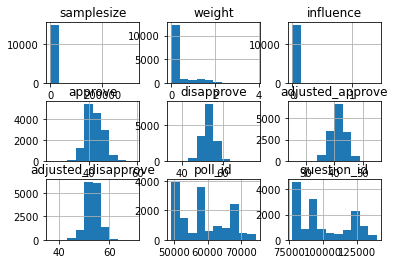

'\nHelps us understand the data is skew, Gaussian and exponential distribution \nAlso help us to see the possible outliner'

In [23]:
histogram=df.hist()
layout = 3,2
pyplot.show()
'''
Helps us understand the data is skew, Gaussian and exponential distribution 
Also help us to see the possible outliner'''

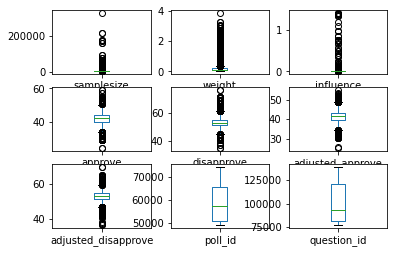

In [24]:
M=df.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)
layout = 5,5

### Varying the plot with parameters

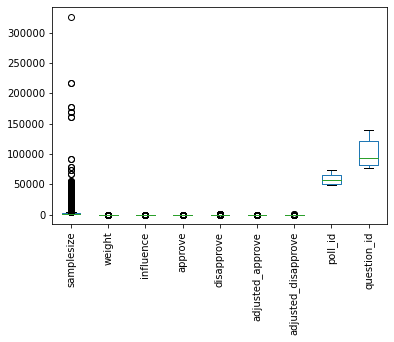

In [25]:
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=False,layout=(4,3),sharex=False,sharey=False)
layout = 5,8
plt.xticks(rotation = 90)
plt.show()

### Density Plots

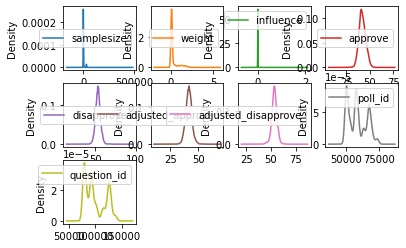

In [26]:
K=df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,sharey=False)
layout = 5,8

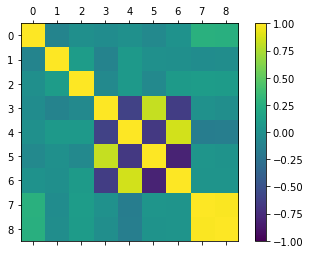

In [27]:
#Correlation Matrix

correlations = df.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
layout = 5,8
#ax.set_xlabel(col_names)
#ax.set_ylabel(col_names)
pyplot.show()

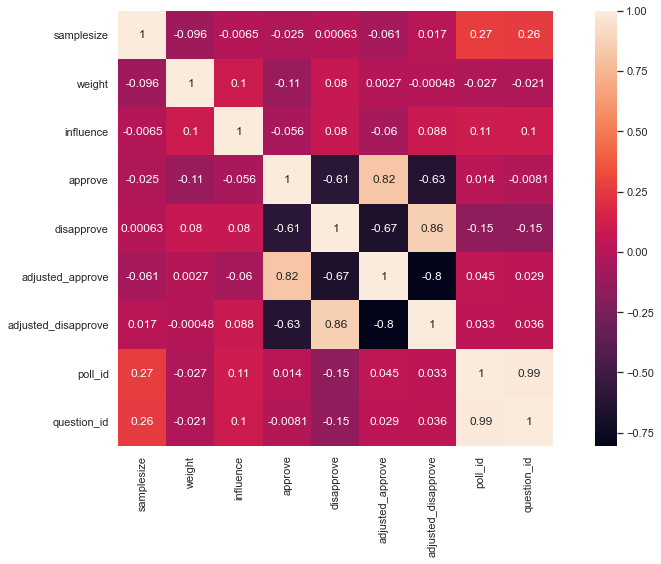

In [28]:
import seaborn as sns
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

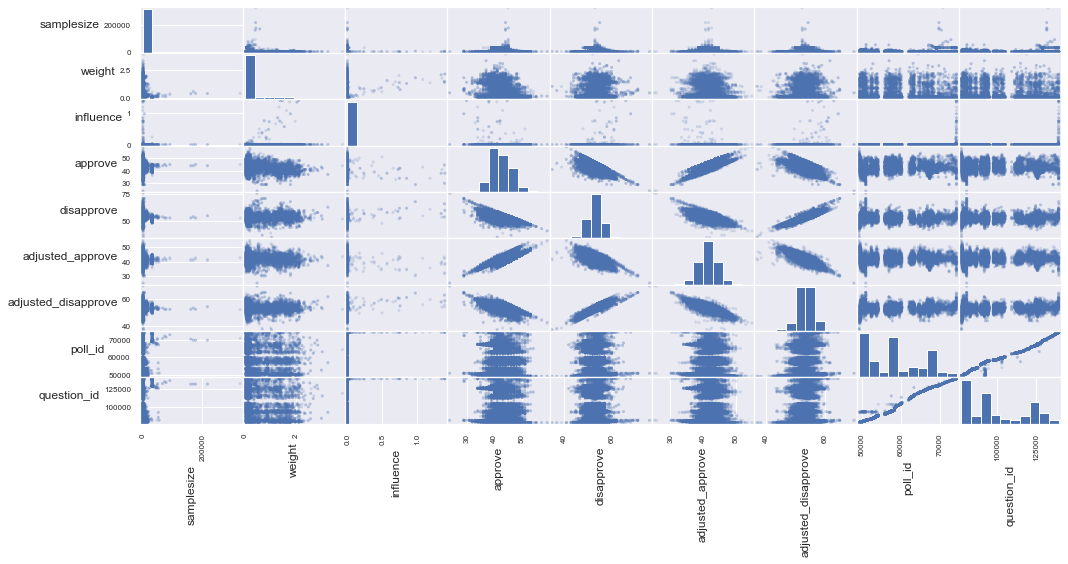

In [29]:
from pandas.plotting import scatter_matrix
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

# Graph below generated does not looks easily understandable with lot's of subplots. decided to recreate using matplotlib.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


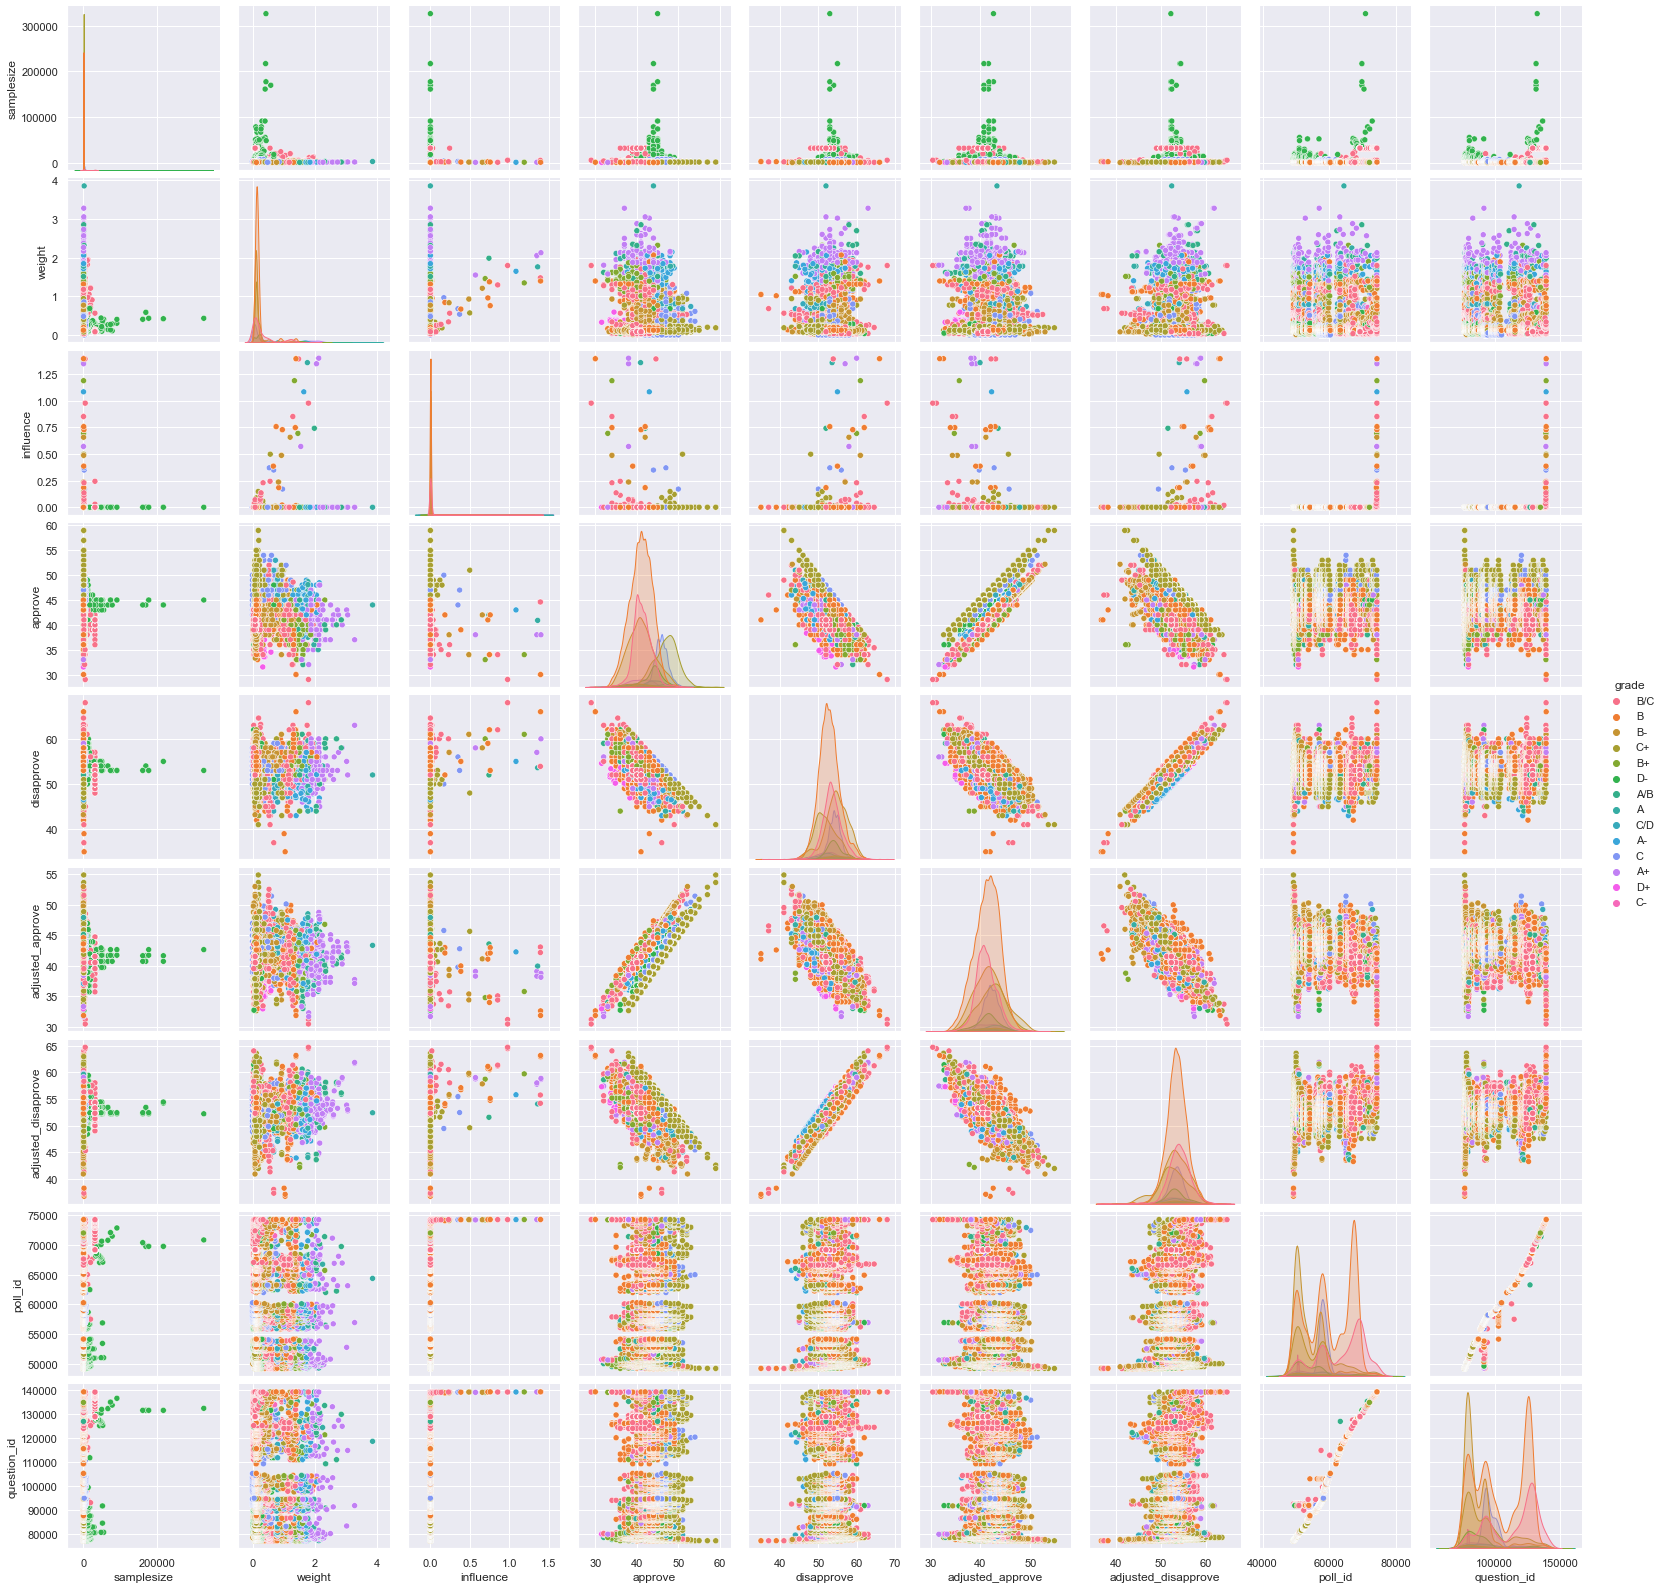

In [30]:
import seaborn as sns

# Pairplot for overlook
sns.pairplot(df,hue='grade')

# Principal Component Analysis(PCA)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subgroup             15000 non-null  object 
 1   pollster             15000 non-null  object 
 2   grade                14546 non-null  object 
 3   samplesize           15000 non-null  float64
 4   population           15000 non-null  object 
 5   weight               15000 non-null  float64
 6   influence            15000 non-null  float64
 7   approve              15000 non-null  float64
 8   disapprove           15000 non-null  float64
 9   adjusted_approve     15000 non-null  float64
 10  adjusted_disapprove  15000 non-null  float64
 11  multiversions        80 non-null     object 
 12  tracking             6368 non-null   object 
 13  poll_id              15000 non-null  int64  
 14  question_id          15000 non-null  int64  
dtypes: float64(7), int64(2), object(6)
m

In [32]:
df = pd.get_dummies(df)
df

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id,subgroup_Adults,...,grade_C-,grade_C/D,grade_D+,grade_D-,population_a,population_lv,population_rv,population_v,multiversions_*,tracking_T
0,1992.0,0.68,0.0,46.0,37.0,45.69,38.06,49249,77261,0,...,0,0,0,0,0,0,1,0,0,0
1,1500.0,0.26,0.0,45.0,45.0,45.86,43.54,49253,77265,0,...,0,0,0,0,1,0,0,0,0,1
2,1632.0,0.15,0.0,42.1,45.2,43.45,43.78,49426,77599,0,...,0,0,0,0,1,0,0,0,0,1
3,1500.0,0.24,0.0,45.0,46.0,45.86,44.54,49262,77274,0,...,0,0,0,0,1,0,0,0,0,1
4,1500.0,0.23,0.0,46.0,45.0,46.86,43.54,49236,77248,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,31920.0,0.08,0.0,41.0,52.0,41.50,52.34,69148,128992,0,...,0,0,0,0,0,1,0,0,0,1
14996,740.0,0.12,0.0,45.0,53.0,44.56,52.29,63250,115593,0,...,0,0,0,0,0,0,1,0,0,0
14997,1500.0,0.08,0.0,48.0,50.0,43.84,50.99,63256,115617,0,...,0,0,0,0,0,1,0,0,0,1
14998,745.0,0.12,0.0,44.0,54.0,43.56,53.29,63259,115635,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
from sklearn.decomposition import PCA

In [34]:
pca=PCA(n_components=2)

In [35]:
X_pca=pca.fit_transform(df)

In [36]:
#Varience 
# pca=PCA(.95)

In [37]:
X_pca.shape

(15000, 2)

In [38]:
pca.explained_variance_ratio_

array([0.85861744, 0.13974381])

In [39]:
pca.n_components_

2

### K-Mean Algorithm

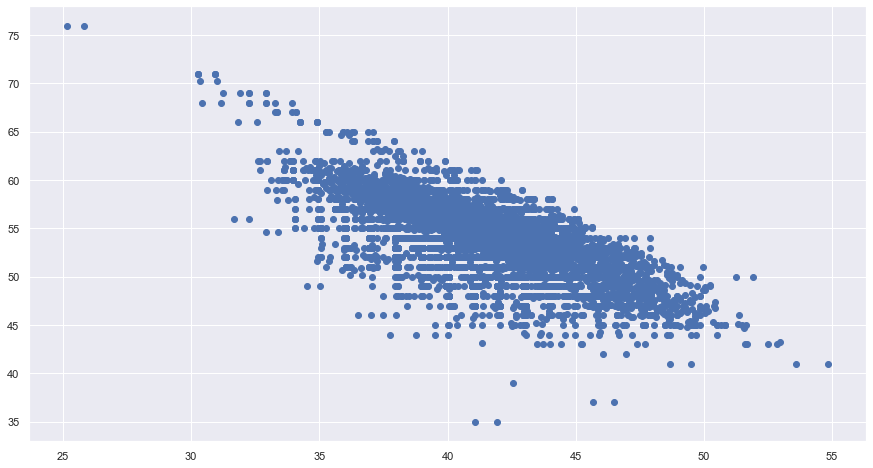

In [40]:
plt.scatter(df['adjusted_approve'],df['disapprove'])

In [41]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [42]:
y_predicted = km.fit_predict(df[['adjusted_approve','disapprove']])
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
df['cluster'] = y_predicted
df.tail()

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id,subgroup_Adults,...,grade_C/D,grade_D+,grade_D-,population_a,population_lv,population_rv,population_v,multiversions_*,tracking_T,cluster
14995,31920.0,0.08,0.0,41.0,52.0,41.50,52.34,69148,128992,0,...,0,0,0,0,1,0,0,0,1,1
14996,740.0,0.12,0.0,45.0,53.0,44.56,52.29,63250,115593,0,...,0,0,0,0,0,1,0,0,0,1
14997,1500.0,0.08,0.0,48.0,50.0,43.84,50.99,63256,115617,0,...,0,0,0,0,1,0,0,0,1,1
14998,745.0,0.12,0.0,44.0,54.0,43.56,53.29,63259,115635,0,...,0,0,0,0,0,1,0,0,0,1
14999,31920.0,0.08,0.0,41.0,52.0,41.50,52.34,69149,128993,0,...,0,0,0,0,1,0,0,0,1,1


In [44]:
km.cluster_centers_

array([[39.53325368, 55.63819574],
       [43.28202308, 51.26466902]])

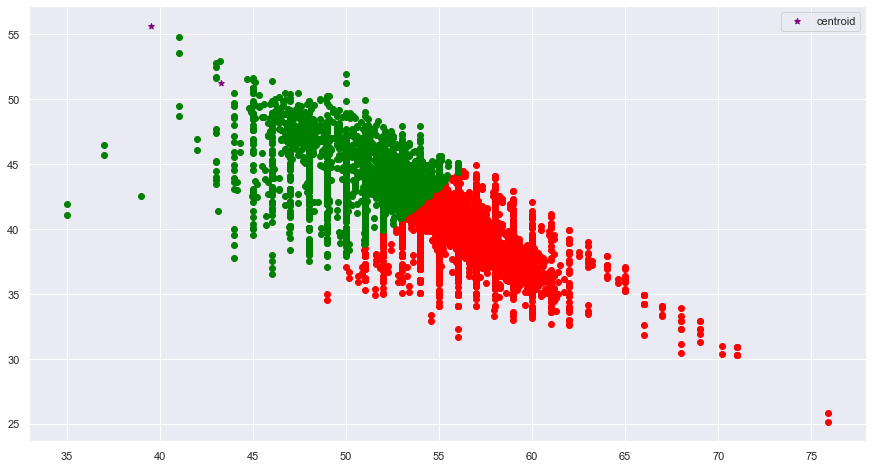

In [45]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.disapprove,df1['adjusted_approve'],color='red')
plt.scatter(df2.disapprove,df2['adjusted_approve'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [46]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['disapprove','adjusted_approve']])
    sse.append(km.inertia_)

In [47]:
# sum of squared error
sse

[257884.43633854395,
 133857.53375399587,
 91553.30453135347,
 74090.13130831,
 61276.153808194365,
 52193.70831930852,
 45863.62658755843,
 40907.85712075134,
 36943.410520390506]

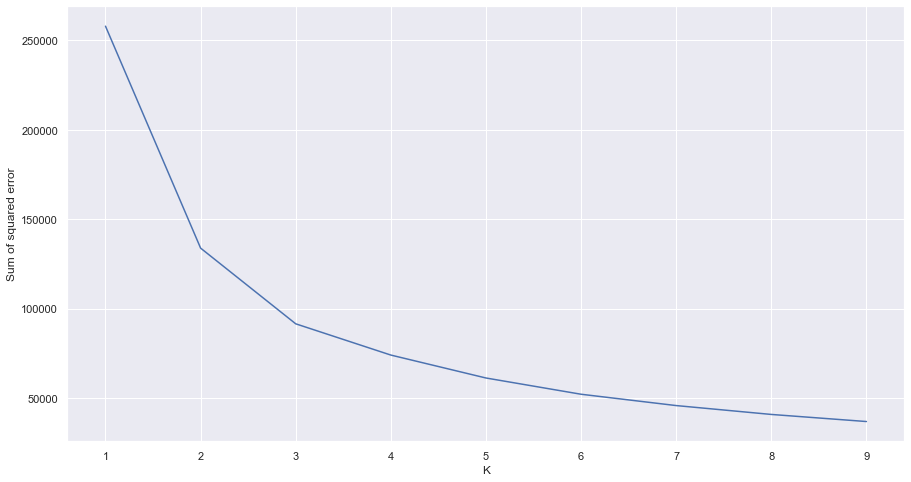

In [74]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### KNN Algorithm

In [75]:
# scaling of the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_f= scaler.fit_transform(df)

In [76]:
# scaled_f

In [77]:
df = df.dropna()

In [78]:
df1 = df.drop(['population_a'], axis=1)
df1

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id,subgroup_Adults,...,grade_C-,grade_C/D,grade_D+,grade_D-,population_lv,population_rv,population_v,multiversions_*,tracking_T,cluster
0,1992.0,0.68,0.0,46.0,37.0,45.69,38.06,49249,77261,0,...,0,0,0,0,0,1,0,0,0,1
1,1500.0,0.26,0.0,45.0,45.0,45.86,43.54,49253,77265,0,...,0,0,0,0,0,0,0,0,1,1
2,1632.0,0.15,0.0,42.1,45.2,43.45,43.78,49426,77599,0,...,0,0,0,0,0,0,0,0,1,1
3,1500.0,0.24,0.0,45.0,46.0,45.86,44.54,49262,77274,0,...,0,0,0,0,0,0,0,0,1,1
4,1500.0,0.23,0.0,46.0,45.0,46.86,43.54,49236,77248,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,31920.0,0.08,0.0,41.0,52.0,41.50,52.34,69148,128992,0,...,0,0,0,0,1,0,0,0,1,1
14996,740.0,0.12,0.0,45.0,53.0,44.56,52.29,63250,115593,0,...,0,0,0,0,0,1,0,0,0,1
14997,1500.0,0.08,0.0,48.0,50.0,43.84,50.99,63256,115617,0,...,0,0,0,0,1,0,0,0,1,1
14998,745.0,0.12,0.0,44.0,54.0,43.56,53.29,63259,115635,0,...,0,0,0,0,0,1,0,0,0,1


In [79]:
df1

,samplesize,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,poll_id,question_id,subgroup_Adults,...,grade_C-,grade_C/D,grade_D+,grade_D-,population_lv,population_rv,population_v,multiversions_*,tracking_T,cluster
0,1992.0,0.68,0.0,46.0,37.0,45.69,38.06,49249,77261,0,...,0,0,0,0,0,1,0,0,0,1
1,1500.0,0.26,0.0,45.0,45.0,45.86,43.54,49253,77265,0,...,0,0,0,0,0,0,0,0,1,1
2,1632.0,0.15,0.0,42.1,45.2,43.45,43.78,49426,77599,0,...,0,0,0,0,0,0,0,0,1,1
3,1500.0,0.24,0.0,45.0,46.0,45.86,44.54,49262,77274,0,...,0,0,0,0,0,0,0,0,1,1
4,1500.0,0.23,0.0,46.0,45.0,46.86,43.54,49236,77248,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,31920.0,0.08,0.0,41.0,52.0,41.50,52.34,69148,128992,0,...,0,0,0,0,1,0,0,0,1,1
14996,740.0,0.12,0.0,45.0,53.0,44.56,52.29,63250,115593,0,...,0,0,0,0,0,1,0,0,0,1
14997,1500.0,0.08,0.0,48.0,50.0,43.84,50.99,63256,115617,0,...,0,0,0,0,1,0,0,0,1,1
14998,745.0,0.12,0.0,44.0,54.0,43.56,53.29,63259,115635,0,...,0,0,0,0,0,1,0,0,0,1


In [80]:
x = df1.copy()
x.drop(columns=['cluster'],inplace=True)
y = df['population_a'].copy()

In [81]:
x = df.copy()
y = y_predicted

In [82]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [83]:

print(y)
print(x.shape)

[1 1 1 ... 1 1 1]
(15000, 126)


In [84]:
from sklearn.model_selection import train_test_split

#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.7723333333333333